In [1]:
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
import sympy as sy
import scipy.linalg as la 
import scipy.sparse.linalg as spla
import time 
import matplotlib.pyplot as plt
import cmath
from utils import helper
sy.init_printing()
%matplotlib inline

### Problem 1. 
Write a function in Python that estimates the probability that a random draw from the standard normal distribution is greater than 3 using Equation 13.2. Your function should accept a parameter n for the number of samples to use in your approximation. Your answer should approach 0.0013499 for sufficiently large samples.

In [2]:
def monte_carlo_normal(n):
    xs = np.random.normal(size=n)
    return np.mean(xs>3)

In [3]:
%%time
n = 10**7
print(monte_carlo_normal(n))

0.0013315
CPU times: user 416 ms, sys: 36.8 ms, total: 453 ms
Wall time: 453 ms


In [4]:
%%time
h = lambda x: x>3
f = lambda x: stats.norm().pdf(x)
g = lambda x: stats.norm(loc=4, scale=1).pdf(x)

X = np.random.normal(4, scale=1, size=n)

print(np.mean(h(X)*f(X)/g(X)))

0.00134748468917
CPU times: user 1.65 s, sys: 612 ms, total: 2.26 s
Wall time: 2.27 s


In [5]:
ns = np.arange(1000, 600000, 10000)
trueval = 0.0013499
mc_errors = []
is_errors = []
for n in ns:
    #monte carlo
    mc_errors.append(np.abs(monte_carlo_normal(n)-trueval))
    #importance sampling
    X = np.random.normal(4, scale=1, size=n)
    is_errors.append(np.abs(np.mean(h(X)*f(X)/g(X))-trueval))

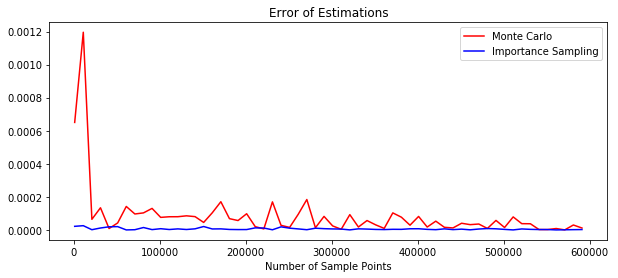

In [6]:
plt.figure(figsize=(10,4))
plt.plot(ns, mc_errors, 'r', label = "Monte Carlo")
plt.plot(ns, is_errors, 'b', label = "Importance Sampling")
plt.legend()
plt.title("Error of Estimations")
plt.xlabel("Number of Sample Points")

### Problem 2. 
A tech support hotline receives an average of 2 calls per minute. What is the probability that they will have to wait at least 10 minutes to receive 9 calls? Implement your estimator using importance sampling. Calculate estimates using $5000, 10000, 15000, ···, 500000$ sample points. Return an array of estimates. Your answers should approach `0.00208726`.

Hint: In `Volume 2 §3.5`, the gamma distribution is defined as, 
$$f_X(x) = \frac{b^ax^{a-1}e^{-xb}}{ \Gamma (a)}$$
The version of the gamma distribution in `scipy.stats` is determined by the shape $(a)$ and the scale $(\theta)$ of the distribution. 
$$f_X(x) = \frac{x^{a-1}e^{-x/\theta}}{ \Gamma (a)\theta^a}$$

You can switch between these representations this with the fact that $\theta = 1/b$.

### Problem 3.
In this problem, we will visualize the benefits of importance sampling. Create a plot of the error of the traditional methods of Monte Carlo integration and the importance sampling methods of Monte Carlo for Problem 2. What do you observe? Your plot should resemble Figure 13.2.

In [7]:
theta = .5 #2 calls per minute
shape = 9
trueval = 1 - stats.gamma(a=9,scale=0.5).cdf(10)

h = lambda x: x>10
f = lambda x: stats.gamma.pdf(x, shape, scale=theta)
g = lambda x: stats.gamma(shape, scale=theta).pdf(x) #let's say importance dist is also gamma

In [8]:
ns = np.arange(5, 505, 5)*1000
mc_errors = []
is_errors = []
for n in ns:
    mc_errors.append(np.mean(h(np.random.gamma(shape, scale=theta, size=n))))
    X = np.random.gamma(shape, scale=theta, size=n)
    is_errors.append(np.abs(np.mean(h(X)*f(X)/g(X)) - trueval))

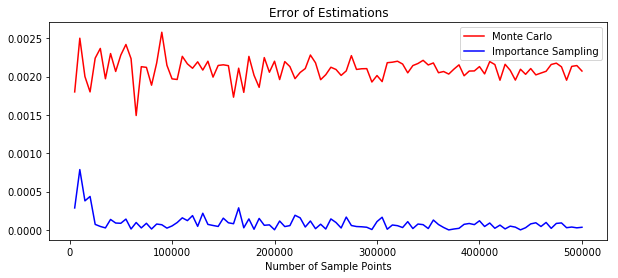

In [9]:
plt.figure(figsize=(10,4))
plt.plot(ns, mc_errors, 'r', label='Monte Carlo')
plt.plot(ns, is_errors, 'b', label="Importance Sampling")
plt.legend()
plt.title("Error of Estimations")
plt.xlabel("Number of Sample Points")

### Problem 4. 
The joint normal distribution of N independent random variables with mean 0 and variance 1 is

$$f(x) = \frac{1}{\sqrt{2\pi}^N}e^{-\frac{x^Tx}{2}}$$

The integral of $f_X(x)$ over a box is the probability that a draw from the distribution will be in the box. However, $f_X(x)$ does not have a symbolic antiderivative.

Use what you have learned about importance sampling to estimate the probability that a given random variable in $\mathbb{R}^2$ generated by $f_X$ will be less than -1 in the x-direction and greater than 1 in the y-direction.

Treat $f_X$ as the p.d.f. of your target distribution. Use the function `stats.multivariate_normal` to create a multivariate normal distribution to serve as your importance distribution. For more information on how to use this function, consult the documentation for `stats.multivariate_normal`.

In [10]:
n = 5000000
h = lambda x: (x[:,0]<-1) & (x[:,1]>1)
f = lambda x: stats.multivariate_normal.pdf(x, mean=np.zeros(2), cov = np.eye(2))
g = lambda x: stats.multivariate_normal(mean=np.array([0, 0]), cov = np.eye(2)).pdf(x) #importance distribution in (0,0)
X = np.random.multivariate_normal(mean=np.array([0, 0]), cov=np.eye(2), size=n)
np.mean(h(X)*f(X)/g(X)) 